<a class="anchor" id="0"></a>
# **GROUP 8 BIP A&E Technical Challenge**
​
​
Dear Reader, 

**Our challenge** was to employ machine learning techniques to develop an algorithm that predicts admissions to the hospital's emergency department. This notebook commences with this  <font color="red"><b>Warm Welcome 🤗 </b></font>, followed by a comprehensive table of contents summarizing our efforts. The dedicated efforts of Group 8 members over the past six weeks have been poured into this work. We invite you to explore our journey and hope you find valuable insights within our contributions.
  
  
  
  


<a class="anchor" id="0.1"></a>
# **Table of Contents**



1. [Introduction](#1)
2. [About the dataset](#2)
   - 2.1. [Overview of the Dataset](#2.1)
3. [Data Preprocessing](#3)
   - 3.1 [Data Exploration & Data visualization](#3.1)
   - 3.2 [Data cleaning](#3.2)
   - 3.3 [Encoding Categorical variables](#3.3)
4. [Feature selection (Filter Methods)](#4)
   - 4.1 [Removing constant features](#4.1)
   - 4.2 [Using K-best](#4.2)
   - 4.3 [Correlation-Matrix with Heatmap](#4.3)
5. [Model Training](#5)
   - 5.1 [Logistic Regression with Ridge Regularization](#5.1)
   - 5.2 [Decision Trees](#5.2)
   - 5.3 [Random Forest using GridCV](#5.3)
   - 5.4 [XGBoost](#5.4)
   - 5.5 [K-Means Clustering](#5.5)
   - 5.6 [Deep Neural Network](#5.6)
6. [Results](#6)   
7. [Features with the highest co-efficients](#7)
8. [Additional stretch of our model using Streamlit](#8)
9. [Discussion](#9)
10. [Limitations](#10)
11. [Conclusions](#11)
11. [References](#11)



# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)



In the Emergency Department (ED) in most Health institutions, a key challenge is identifying quickly who needs to be admitted to the hospital. Our challenge is to use Machine Learning (ML) to help us with this task, aiming to improve healthcare diagnostics. 

Traditionally, doctors rely on their judgment and lab results which is commonly referred to as "Triage". Unfortunately, human-related errors can lead to serious consequences.

ED triage systems aim to categorize high-risk patients accurately and make the best use of the limited resources we have. Our work involves using machine learning to tackle these issues and make emergency healthcare even better.

# **2. About the dataset** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


For privacy reasons, patient data remains confidential and isn't publicly accessible. The data utilized here is entirely synthetic. While it's derived from genuine patient records, it doesn't directly represent any specific individual.

Throughout the data collection process, we identified certain fields that exhibited unusual patterns or inconsistencies with other fields. We addressed these observations during our data preprocessing steps. The initial dataset consisted of 100,000 rows and 18 columns. To provide clarity, a comprehensive data dictionary(group-8s-data-dictionary) is included in this report. This dictionary outlines the definitions and significance of each column.

In the subsequent code section, our attention turns to data inspection and preliminary data visualization. This pivotal step allows us to grasp the dataset's structure and characteristics, thus paving the way for more in-depth analysis.


**Importing Libraries**
Because Kaggle's platform doesn't provide a built-in virtual environment system,we would skip creating one. However, before working on a project it is good practice to do so to ensure your code runs smoothly, and it can be particularly useful if you plan to share your work or collaborate with others. 

In [1]:
# Importing required Libraries and Datasets

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree # to build a classification tree 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/group8-data-dictionary/Data dictionary.docx
/kaggle/input/bip-ae-technical-challenge/skinny_unanswered_set.csv
/kaggle/input/bip-ae-technical-challenge/test_set.csv
/kaggle/input/bip-ae-technical-challenge/training_set.csv
/kaggle/input/bip-ae-technical-challenge/Data_Dictionary.xlsx
/kaggle/input/bip-ae-technical-challenge/example_answer_sheet.csv
/kaggle/input/cleaned-data/cleaned_data.csv


In [2]:
# reading the dataset and taking a look at it 
import pandas as pd 
df = pd.read_csv('../input/bip-ae-technical-challenge/training_set.csv')
print("Shape of df :",df.shape)
df.head(10)

Shape of df : (100000, 18)


,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,ICD10_Chapter_Code,Treatment_Function_Code,Length_Of_Stay_Days,Record_ID
0,7.0,18-24,2.0,2016-02-15T00:00:00Z,01-04,650,Low,2,2,1,1,8.0,15149,0,NaN,NaN,NaN,765388
1,7.0,1-17,2.0,2016-03-12T00:00:00Z,21-24,200,Low,1,1,1,2,1.0,15099,0,NaN,NaN,NaN,774977
2,2.0,45-64,2.0,2016-06-22T00:00:00Z,13-16,40,Low,1,1,4,2,1.0,15194,0,NaN,NaN,NaN,769250
3,1.0,85+,2.0,2015-04-14T00:00:00Z,17-20,110,Low,1,1,2,1,1.0,15260,1,IX,300,42.0,795829
4,3.0,18-24,1.0,2014-07-06T00:00:00Z,13-16,60,Low,1,2,2,2,2.0,15105,0,NaN,NaN,NaN,732712
5,4.0,65-84,1.0,2015-03-09T00:00:00Z,13-16,180,High,1,7,2,1,8.0,15231,1,Other,300,3.0,252909
6,8.0,65-84,1.0,2014-06-09T00:00:00Z,17-20,460,Low,1,10,10,1,16.0,15310,1,XIX,OTHER,23.0,141173
7,6.0,45-64,2.0,2017-01-02T00:00:00Z,17-20,130,Nothing,1,1,2,1,24.0,15285,1,Other,300,7.0,942881
8,4.0,45-64,1.0,2016-09-27T00:00:00Z,01-04,840,Low,1,8,3,2,0.0,15273,1,XI,100,3.0,587134
9,5.0,1-17,2.0,2014-06-23T00:00:00Z,09-12,150,Low,2,2,3,2,6.0,15353,0,NaN,NaN,NaN,81582


# **3. Data Preprocessing** <a class="anchor" id="3"></a>
​
[Table of Contents](#0.1)
​
​



In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   IMD_Decile_From_LSOA             99734 non-null   float64
 1   Age_Band                         100000 non-null  object 
 2   Sex                              99542 non-null   float64
 3   AE_Arrive_Date                   100000 non-null  object 
 4   AE_Arrive_HourOfDay              99542 non-null   object 
 5   AE_Time_Mins                     100000 non-null  int64  
 6   AE_HRG                           98466 non-null   object 
 7   AE_Num_Diagnoses                 100000 non-null  int64  
 8   AE_Num_Investigations            100000 non-null  int64  
 9   AE_Num_Treatments                100000 non-null  int64  
 10  AE_Arrival_Mode                  100000 non-null  int64  
 11  Provider_Patient_Distance_Miles  99734 non-null   float64
 12  Pro

In [305]:
df.columns

Index(['IMD_Decile_From_LSOA', 'Age_Band', 'Sex', 'AE_Arrive_Date',
       'AE_Arrive_HourOfDay', 'AE_Time_Mins', 'AE_HRG', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Admitted_Flag',
       'ICD10_Chapter_Code', 'Treatment_Function_Code', 'Length_Of_Stay_Days',
       'Record_ID'],
      dtype='object')

## 3.1. Data Exploration & Data visualization  <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


Now, we will explore the data to gain insights about the data. 

In [306]:
df['Admitted_Flag'].value_counts()

1    50084
0    49916
Name: Admitted_Flag, dtype: int64

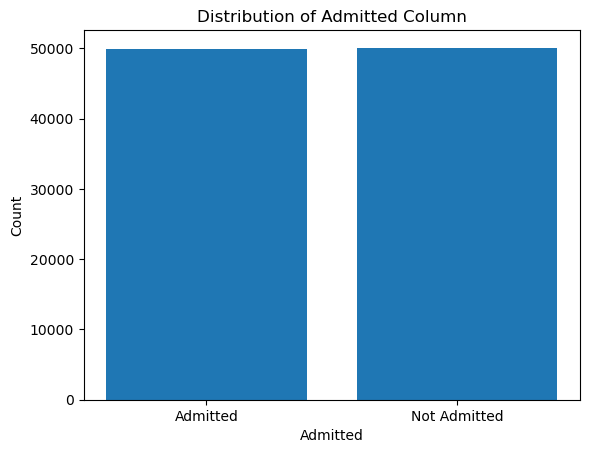

In [307]:
# to check if out target column is balanced
value_counts = df['Admitted_Flag'].value_counts()

# Plot the bar chart
plt.bar(value_counts.index, value_counts.values)

# Customize the plot
plt.xlabel('Admitted')
plt.ylabel('Count')
plt.title('Distribution of Admitted Column')
plt.xticks(value_counts.index, ['Not Admitted', 'Admitted'])

# Show the plot
plt.show()

In [308]:
# unlike our earlier assumption that those with nan (icd10 code and func_code)
# were perhaps not admitted, the admitted flag here shows its not an accurate assumption.
# we decided to drop all these rows as they have quite a number of nan values across columns 

nan_rows = df[df['AE_Arrive_HourOfDay'].isna()]
nan_rows

,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,ICD10_Chapter_Code,Treatment_Function_Code,Length_Of_Stay_Days,Record_ID
94,NaN,85+,NaN,2017-10-07T00:00:00Z,NaN,80,Medium,1,1,5,0,NaN,15375,1,NaN,NaN,NaN,430132
546,2.0,85+,NaN,2016-05-15T00:00:00Z,NaN,240,Low,1,2,1,0,3.0,15368,1,NaN,NaN,NaN,671714
620,4.0,85+,NaN,2014-04-19T00:00:00Z,NaN,10,Low,1,1,4,0,0.0,15374,1,NaN,NaN,NaN,687237
628,7.0,85+,NaN,2016-07-23T00:00:00Z,NaN,920,Nothing,0,0,1,0,7.0,25911,1,NaN,NaN,NaN,273180
940,NaN,85+,NaN,2014-05-25T00:00:00Z,NaN,110,Low,1,1,1,0,NaN,15375,1,NaN,NaN,NaN,724580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99160,NaN,85+,NaN,2017-09-29T00:00:00Z,NaN,180,Low,1,1,2,0,NaN,27225,1,NaN,NaN,NaN,412284
99337,NaN,85+,NaN,2015-07-08T00:00:00Z,NaN,180,Low,1,1,2,0,NaN,15375,1,NaN,NaN,NaN,93970
99401,NaN,85+,NaN,2016-07-23T00:00:00Z,NaN,0,Low,1,1,0,0,NaN,25999,1,NaN,NaN,NaN,413378
99617,4.0,85+,NaN,2015-06-14T00:00:00Z,NaN,10,Low,1,1,5,0,2.0,15396,1,NaN,NaN,NaN,482634


In [3]:
# as they are 458 rows which is not that large compared to our data we decided to drop these rows
df = df.dropna(subset=['AE_Arrive_HourOfDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99542 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band                         99542 non-null  object 
 2   Sex                              99541 non-null  float64
 3   AE_Arrive_Date                   99542 non-null  object 
 4   AE_Arrive_HourOfDay              99542 non-null  object 
 5   AE_Time_Mins                     99542 non-null  int64  
 6   AE_HRG                           98039 non-null  object 
 7   AE_Num_Diagnoses                 99542 non-null  int64  
 8   AE_Num_Investigations            99542 non-null  int64  
 9   AE_Num_Treatments                99542 non-null  int64  
 10  AE_Arrival_Mode                  99542 non-null  int64  
 11  Provider_Patient_Distance_Miles  99542 non-null  float64
 12  ProvID            

In [310]:
# to get the freq table and statistics on how far patients had to travel to the ED,
# maximum distance shows 200miles
df['Provider_Patient_Distance_Miles'].describe()

count    99542.000000
mean         7.076058
std         16.728867
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max        200.000000
Name: Provider_Patient_Distance_Miles, dtype: float64

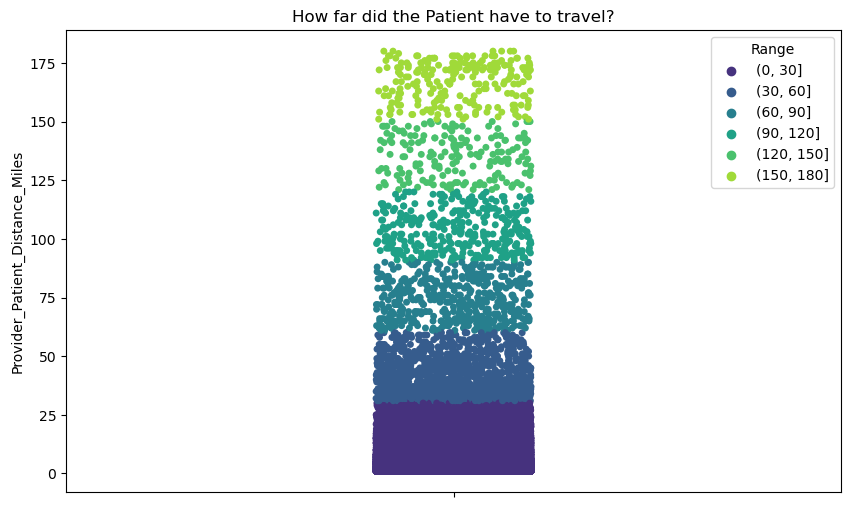

In [311]:
# plotted a graph to visualize the distance they had to go, as we can see 
# there is consistence in extreme distances which may indicate that extreme miles are not outliers???  
# we would leave values as such for now
df['Range'] = pd.cut(df['Provider_Patient_Distance_Miles'], bins=range(0, 200, 30))  # Creating a range column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.stripplot(data=df, y='Provider_Patient_Distance_Miles', hue='Range', palette='viridis', size=5)
# Set the labels and title
plt.ylabel('Provider_Patient_Distance_Miles')
plt.title('How far did the Patient have to travel?')

# Show the plot
plt.show()


In [312]:
df = df.drop(columns = 'Range') #dropping range col

In [313]:
# exploring he length of days px was admitted for
df['Length_Of_Stay_Days'].value_counts()

0.0      12021
1.0      10897
2.0       5382
3.0       3674
4.0       2663
         ...  
138.0        1
158.0        1
162.0        1
74.0         1
147.0        1
Name: Length_Of_Stay_Days, Length: 140, dtype: int64

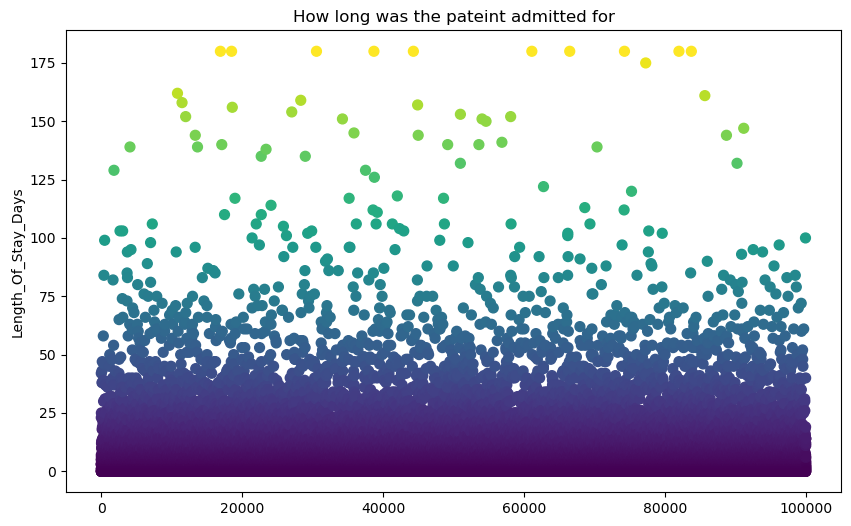

In [314]:

# how long the patient was admitted for already indicates ptx was admitted and perhaps potential data leakage 
# so we dropped this column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df.index, df['Length_Of_Stay_Days'], c=df['Length_Of_Stay_Days'], cmap='viridis', s=50)

plt.ylabel('Length_Of_Stay_Days')
plt.title('How long was the pateint admitted for')

# Show the plot
plt.show()

2.0    50826
1.0    48715
Name: Sex, dtype: int64


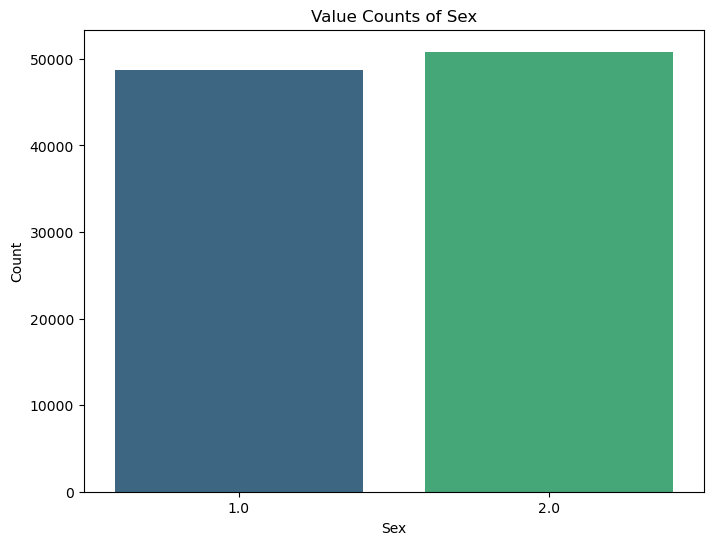

In [315]:
# looking at the spread for diferent sexes
print(df['Sex'].value_counts())
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.countplot(data=df, x='Sex', palette='viridis')

# Set the labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Value Counts of Sex')

# Show the plot
plt.show()

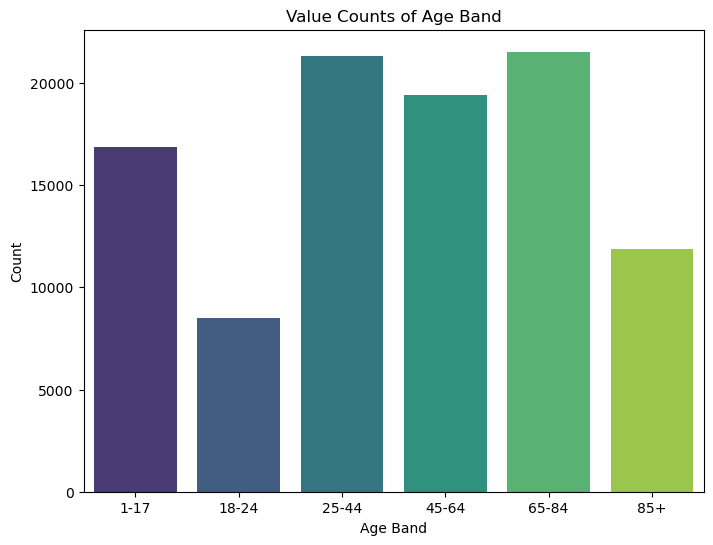

In [316]:
# visualizng the ageband to see if its evenely distributed 

# Sort the unique values in the Age_Band column
sorted_age_bands = df['Age_Band'].sort_values().unique()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.countplot(data=df, x='Age_Band', palette='viridis', order=sorted_age_bands)

# Set the labels and title
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.title('Value Counts of Age Band')

# Show the plot
plt.show()

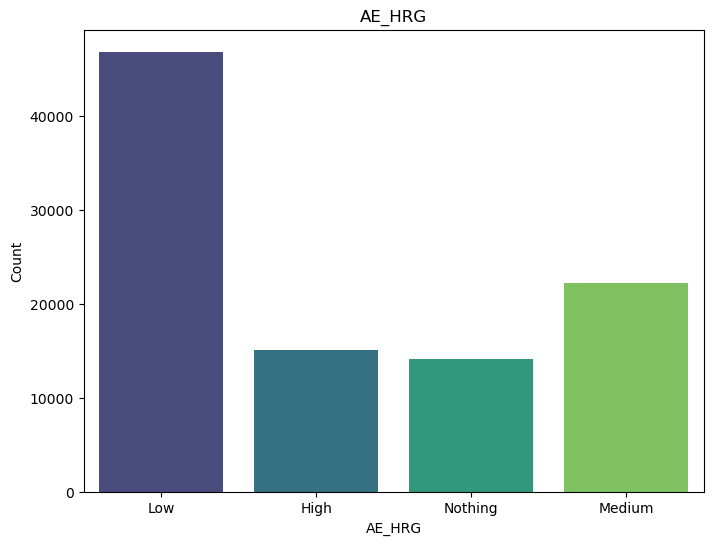

In [317]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.countplot(data=df, x='AE_HRG',  palette='viridis')

# Set the labels and title
plt.xlabel('AE_HRG')
plt.ylabel('Count')
plt.title('AE_HRG')

# Show the plot
plt.show()

In [318]:
df['ICD10_Chapter_Code'].value_counts()

Other    12027
XVIII     9705
XIX       7572
X         7389
IX        4447
XI        4324
XIV       3317
Name: ICD10_Chapter_Code, dtype: int64

In [319]:
df['Treatment_Function_Code'].value_counts()

300      19470
OTHER    14365
180       6540
420       4683
100       4560
Name: Treatment_Function_Code, dtype: int64

#### Findings and actions

- Our target variable, `Admitted_Flag`, is relatively balanced, showing a slightly higher count of admitted cases.
- We pruned rows with excessive missing data to clean up the dataset.
- When examining features like distance in miles, we aimed to identify outliers. Interestingly, even for considerable distances, records were spread across a wide range.
- To avoid data leakage, we removed the `Length_Of_Stay_Days` column.
- The `Sex` column displayed an even distribution, with code 2.0 having the highest occurrences.
- The `Age_Band` column exhibited diverse age groups.
- The `ICD10_Chapter_Code` and `Treatment_Function_Code` columns contained numerous 'OTHER' labels, which lack specific information.


**JUMI'S EXPLORATION*

## 3.2. Data Cleaning  <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


#### Actions

During the data cleaning process, we took the following steps:
- In the `ICD10_Chapter_Code` and `Treatment_Function_Code` columns, we replaced missing values with a new label, 'unknown', ensuring our data remained intact.
- To enhance the usability of the `AE_Arrive_Date` feature, we converted its date format into a machine-learning-friendly integer format.
- Similarly, for the `AE_Arrive_HourOfDay` column, we transformed the time format into an integer representation.
- In the `Sex` column, as the count of missing values was minimal, we opted to replace them with the mode value, maintaining data integrity.

These data cleaning measures contribute to a more coherent and reliable dataset for our analysis.

In [4]:
# Data cleaning

def clean_df(df):
    # Fill missing values in categorical columns
    df['AE_HRG'] = df['AE_HRG'].fillna('Unknown')
    df['Sex'] = df['Sex'].fillna(2.0)
    df['ICD10_Chapter_Code'] = df['ICD10_Chapter_Code'].fillna('Unknown')
    df['Treatment_Function_Code'] = df['Treatment_Function_Code'].fillna('Unknown')
    
    # Convert date and time columns
    df['AE_Arrive_Date'] = pd.to_datetime(df['AE_Arrive_Date'])
    df['AE_Arrive_HourOfDay'] = pd.to_datetime(df['AE_Arrive_HourOfDay'], format='%H-%M').dt.time
    df['Hour'] = pd.to_datetime(df['AE_Arrive_HourOfDay'], format='%H:%M:%S').dt.hour
    df['Minute'] = pd.to_datetime(df['AE_Arrive_HourOfDay'], format='%H:%M:%S').dt.minute
    
    
    # Drop columns
    df = df.drop(columns=['AE_Arrive_Date', 'AE_Arrive_HourOfDay', 'Length_Of_Stay_Days'])
    
    return df

In [5]:
df = clean_df(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99542 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band                         99542 non-null  object 
 2   Sex                              99542 non-null  float64
 3   AE_Time_Mins                     99542 non-null  int64  
 4   AE_HRG                           99542 non-null  object 
 5   AE_Num_Diagnoses                 99542 non-null  int64  
 6   AE_Num_Investigations            99542 non-null  int64  
 7   AE_Num_Treatments                99542 non-null  int64  
 8   AE_Arrival_Mode                  99542 non-null  int64  
 9   Provider_Patient_Distance_Miles  99542 non-null  float64
 10  ProvID                           99542 non-null  int64  
 11  Admitted_Flag                    99542 non-null  int64  
 12  ICD10_Chapter_Code

In [323]:
df

,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,ICD10_Chapter_Code,Treatment_Function_Code,Record_ID,Hour,Minute
0,7.0,18-24,2.0,650,Low,2,2,1,1,8.0,15149,0,Unknown,Unknown,765388,1,4
1,7.0,1-17,2.0,200,Low,1,1,1,2,1.0,15099,0,Unknown,Unknown,774977,21,24
2,2.0,45-64,2.0,40,Low,1,1,4,2,1.0,15194,0,Unknown,Unknown,769250,13,16
3,1.0,85+,2.0,110,Low,1,1,2,1,1.0,15260,1,IX,300,795829,17,20
4,3.0,18-24,1.0,60,Low,1,2,2,2,2.0,15105,0,Unknown,Unknown,732712,13,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,45-64,1.0,230,High,1,4,4,1,7.0,15177,1,XI,300,922616,1,4
99996,5.0,65-84,2.0,240,Low,1,1,2,1,6.0,15175,0,Unknown,Unknown,938129,13,16
99997,5.0,85+,2.0,180,High,1,5,3,2,3.0,15214,1,XVIII,420,555385,9,12
99998,10.0,65-84,2.0,40,Nothing,1,1,1,2,155.0,15232,0,Unknown,Unknown,204676,13,16


#### Considerations

Some columns, including 'AE_Time_Mins' and other time-related columns, raised concerns about potential data leakage. This was because, if these columns were collected after the patient's outcome was determined, they could inadvertently influence the model's predictions. However, upon closer examination of the data dictionary, we discovered that 'AE_Time_Mins' actually represented the time from arrival to the commencement of treatment. This distinction is important, as it does not overlap with the outcome determination process.

Although certain columns, such as 'AE_Arrival_Mode', might appear to have the potential for data leakage due to their potential influence on patient outcomes, we decided to retain them in the dataset. Our rationale is that these features could provide valuable insights to the model about the patient's condition and the circumstances of their arrival at the emergency department. By exercising careful judgment and considering the specific meanings behind these columns, we believe they can contribute positively to the model's predictive performance without introducing data leakage concerns.

In certain instances we excluding these columns from the dataset and trained the model separately. This helped us understand the significance of these columns in influencing the model's predictions.

In [324]:
df.to_csv('clean_data.csv', index=False)

In [325]:
df = pd.read_csv('/kaggle/working/clean_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99542 entries, 0 to 99541
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band                         99542 non-null  object 
 2   Sex                              99542 non-null  float64
 3   AE_Time_Mins                     99542 non-null  int64  
 4   AE_HRG                           99542 non-null  object 
 5   AE_Num_Diagnoses                 99542 non-null  int64  
 6   AE_Num_Investigations            99542 non-null  int64  
 7   AE_Num_Treatments                99542 non-null  int64  
 8   AE_Arrival_Mode                  99542 non-null  int64  
 9   Provider_Patient_Distance_Miles  99542 non-null  float64
 10  ProvID                           99542 non-null  int64  
 11  Admitted_Flag                    99542 non-null  int64  
 12  ICD10_Chapter_Code

In [7]:
df.head(20)
df['Treatment_Function_Code'].unique()

array(['Unknown', '300', 'OTHER', '100', '420', '180'], dtype=object)

In [8]:
# checking for any null values
df.isnull().sum()

IMD_Decile_From_LSOA               0
Age_Band                           0
Sex                                0
AE_Time_Mins                       0
AE_HRG                             0
AE_Num_Diagnoses                   0
AE_Num_Investigations              0
AE_Num_Treatments                  0
AE_Arrival_Mode                    0
Provider_Patient_Distance_Miles    0
ProvID                             0
Admitted_Flag                      0
ICD10_Chapter_Code                 0
Treatment_Function_Code            0
Record_ID                          0
Hour                               0
Minute                             0
dtype: int64

In [9]:
# looking at our categorical values
category_columns =[col for col in df.columns if df[col].dtype == 'object']
category_columns

['Age_Band', 'AE_HRG', 'ICD10_Chapter_Code', 'Treatment_Function_Code']

In [10]:
# frequency distribution of categorical varaibles & percentage of frequency distribution
for var in category_columns: 
    
    print(df[var].value_counts(),'\n', df[var].value_counts()/float(len(df)), '\n')

65-84    21532
25-44    21299
45-64    19420
1-17     16889
85+      11902
18-24     8500
Name: Age_Band, dtype: int64 
 65-84    0.216311
25-44    0.213970
45-64    0.195094
1-17     0.169667
85+      0.119568
18-24    0.085391
Name: Age_Band, dtype: float64 

Low        46781
Medium     22159
High       15031
Nothing    14068
Unknown     1503
Name: AE_HRG, dtype: int64 
 Low        0.469962
Medium     0.222610
High       0.151002
Nothing    0.141327
Unknown    0.015099
Name: AE_HRG, dtype: float64 

Unknown    50761
Other      12027
XVIII       9705
XIX         7572
X           7389
IX          4447
XI          4324
XIV         3317
Name: ICD10_Chapter_Code, dtype: int64 
 Unknown    0.509946
Other      0.120823
XVIII      0.097497
XIX        0.076068
X          0.074230
IX         0.044675
XI         0.043439
XIV        0.033323
Name: ICD10_Chapter_Code, dtype: float64 

Unknown    49924
300        19470
OTHER      14365
180         6540
420         4683
100         4560
Name: Treat

In [11]:
# preview of categorical columns
df[category_columns].head()

,Age_Band,AE_HRG,ICD10_Chapter_Code,Treatment_Function_Code
0,18-24,Low,Unknown,Unknown
1,1-17,Low,Unknown,Unknown
2,45-64,Low,Unknown,Unknown
3,85+,Low,IX,300
4,18-24,Low,Unknown,Unknown


## 3.3. Encoding Categorical variables  <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


#### Encoding variables

We opted for one-hot encoding for all categorical variables, considering there was no inherent ranking among them. Additionally, the number of distinct values within each categorical feature was within a reasonable range (less than 20), which helped prevent the table from becoming excessively wide.

In [12]:
# using one-hot encoding 
encoder = ce.OneHotEncoder(cols=['Age_Band', 'AE_HRG', 'ICD10_Chapter_Code', 'Treatment_Function_Code'])

df = encoder.fit_transform(df)



In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99542 entries, 0 to 99541
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band_1                       99542 non-null  int64  
 2   Age_Band_2                       99542 non-null  int64  
 3   Age_Band_3                       99542 non-null  int64  
 4   Age_Band_4                       99542 non-null  int64  
 5   Age_Band_5                       99542 non-null  int64  
 6   Age_Band_6                       99542 non-null  int64  
 7   Sex                              99542 non-null  float64
 8   AE_Time_Mins                     99542 non-null  int64  
 9   AE_HRG_1                         99542 non-null  int64  
 10  AE_HRG_2                         99542 non-null  int64  
 11  AE_HRG_3                         99542 non-null  int64  
 12  AE_HRG_4          

In [17]:
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']


# **4. Feature selection (Filter Methods)** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



## 4.1. Removing constant features  <a class="anchor" id="4"></a>
​
[Back to Table of Contents](#0.1)
​


#### Important

we would begin with splitting the data into training and testing data:
In all feature selection procedures, it is good practice to select the features by examining only the training set. This is done to avoid overfitting.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# check shape of training and test sets

X_train.shape, X_test.shape

((79633, 37), (19909, 37))

In [20]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [21]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

37

After applying the variance threshold method for feature selection, our analysis indicates that there are no constant features present in the dataset. With this confirmation, we can move forward with other feature selection methods to refine our model's input variables.

## 4.2. Using K-best(SelectKBest)  <a class="anchor" id="4"></a>
​
[Back to Table of Contents](#0.1)
​


In [22]:

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=20)

# Fit the selector on the training data and transform the features
X_selected = selector.fit_transform(X_train, y_train)


# Get the indices of the top-k features
top_k_indices = selector.get_support(indices=True)
selected_feature_names = [X_train.columns[i] for i in top_k_indices]
# to add the field we would to evaluate our work.
# selected_feature_names.append('Record_ID')
selected_feature_names

['Age_Band_5',
 'AE_Time_Mins',
 'AE_HRG_2',
 'AE_HRG_3',
 'AE_Num_Investigations',
 'AE_Num_Treatments',
 'AE_Arrival_Mode',
 'ICD10_Chapter_Code_1',
 'ICD10_Chapter_Code_2',
 'ICD10_Chapter_Code_3',
 'ICD10_Chapter_Code_4',
 'ICD10_Chapter_Code_5',
 'ICD10_Chapter_Code_6',
 'ICD10_Chapter_Code_7',
 'Treatment_Function_Code_1',
 'Treatment_Function_Code_2',
 'Treatment_Function_Code_3',
 'Treatment_Function_Code_4',
 'Treatment_Function_Code_5',
 'Treatment_Function_Code_6']

## 4.3. Correlation-Matrix with Heatmap  <a class="anchor" id="4"></a>
​
[Back to Table of Contents](#0.1)
​



In [339]:
# Convert feature matrix into DataFrame
df_x = pd.DataFrame(X)

# View the data frame
df_x

,IMD_Decile_From_LSOA,Age_Band_1,Age_Band_2,Age_Band_3,Age_Band_4,Age_Band_5,Age_Band_6,Sex,AE_Time_Mins,AE_HRG_1,...,ICD10_Chapter_Code_8,Treatment_Function_Code_1,Treatment_Function_Code_2,Treatment_Function_Code_3,Treatment_Function_Code_4,Treatment_Function_Code_5,Treatment_Function_Code_6,Record_ID,Hour,Minute
0,7.0,1,0,0,0,0,0,2.0,650,1,...,0,1,0,0,0,0,0,765388,1,4
1,7.0,0,1,0,0,0,0,2.0,200,1,...,0,1,0,0,0,0,0,774977,21,24
2,2.0,0,0,1,0,0,0,2.0,40,1,...,0,1,0,0,0,0,0,769250,13,16
3,1.0,0,0,0,1,0,0,2.0,110,1,...,0,0,1,0,0,0,0,795829,17,20
4,3.0,1,0,0,0,0,0,1.0,60,1,...,0,1,0,0,0,0,0,732712,13,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99537,10.0,0,0,1,0,0,0,1.0,230,0,...,0,0,1,0,0,0,0,922616,1,4
99538,5.0,0,0,0,0,1,0,2.0,240,1,...,0,1,0,0,0,0,0,938129,13,16
99539,5.0,0,0,0,1,0,0,2.0,180,0,...,0,0,0,0,0,1,0,555385,9,12
99540,10.0,0,0,0,0,1,0,2.0,40,0,...,0,1,0,0,0,0,0,204676,13,16


In [340]:
# Create correlation matrix
corr_matrix = df_x.corr()
corr_matrix

,IMD_Decile_From_LSOA,Age_Band_1,Age_Band_2,Age_Band_3,Age_Band_4,Age_Band_5,Age_Band_6,Sex,AE_Time_Mins,AE_HRG_1,...,ICD10_Chapter_Code_8,Treatment_Function_Code_1,Treatment_Function_Code_2,Treatment_Function_Code_3,Treatment_Function_Code_4,Treatment_Function_Code_5,Treatment_Function_Code_6,Record_ID,Hour,Minute
IMD_Decile_From_LSOA,1.000000,-0.007207,-0.004438,-0.003123,0.014892,0.018058,-0.017920,-0.001010,0.001575,-0.009165,...,0.001590,-0.012739,0.004347,0.011190,0.004943,-0.002354,0.000718,0.000757,-0.001729,-0.001729
Age_Band_1,-0.007207,1.000000,-0.138121,-0.150431,-0.112602,-0.160530,-0.159421,0.022999,-0.058772,0.011331,...,-0.019276,0.119701,-0.081071,-0.035665,0.009735,-0.067551,-0.011674,0.005558,0.005830,0.005830
Age_Band_2,-0.004438,-0.138121,1.000000,-0.222547,-0.166583,-0.237487,-0.235847,-0.034089,-0.108968,0.029216,...,-0.058724,0.185244,-0.214536,-0.118078,-0.069345,0.323913,-0.081197,0.002672,0.070622,0.070622
Age_Band_3,-0.003123,-0.150431,-0.222547,1.000000,-0.181429,-0.258652,-0.256865,-0.024749,-0.003063,0.001439,...,-0.011741,-0.003440,0.041960,-0.016486,0.046486,-0.109269,0.017302,-0.005113,-0.030383,-0.030383
Age_Band_4,0.014892,-0.112602,-0.166583,-0.181429,1.000000,-0.193609,-0.192272,0.053375,0.110537,-0.026831,...,0.047855,-0.199233,0.107488,0.087531,-0.037946,0.111146,0.042869,-0.001669,0.004787,0.004787
Age_Band_5,0.018058,-0.160530,-0.237487,-0.258652,-0.193609,1.000000,-0.274109,-0.012028,0.126585,-0.033695,...,0.049960,-0.236243,0.228485,0.111977,0.017228,-0.116732,0.037357,-0.001366,-0.033047,-0.033047
Age_Band_6,-0.017920,-0.159421,-0.235847,-0.256865,-0.192272,-0.274109,1.000000,0.009288,-0.071797,0.019204,...,-0.009791,0.147015,-0.103380,-0.033368,0.024640,-0.115579,-0.005869,0.001399,-0.009860,-0.009860
Sex,-0.001010,0.022999,-0.034089,-0.024749,0.053375,-0.012028,0.009288,1.000000,0.023186,0.007458,...,0.010336,-0.022654,0.001695,0.018421,0.005731,0.003400,0.009135,0.000604,0.001872,0.001872
AE_Time_Mins,0.001575,-0.058772,-0.108968,-0.003063,0.110537,0.126585,-0.071797,0.023186,1.000000,-0.052441,...,0.084308,-0.414666,0.219175,0.175307,0.073214,0.064837,0.120098,-0.001019,0.011849,0.011849
AE_HRG_1,-0.009165,0.011331,0.029216,0.001439,-0.026831,-0.033695,0.019204,0.007458,-0.052441,1.000000,...,-0.024097,0.132349,-0.070747,-0.054474,-0.026478,-0.028503,-0.029861,0.001318,0.006245,0.006245


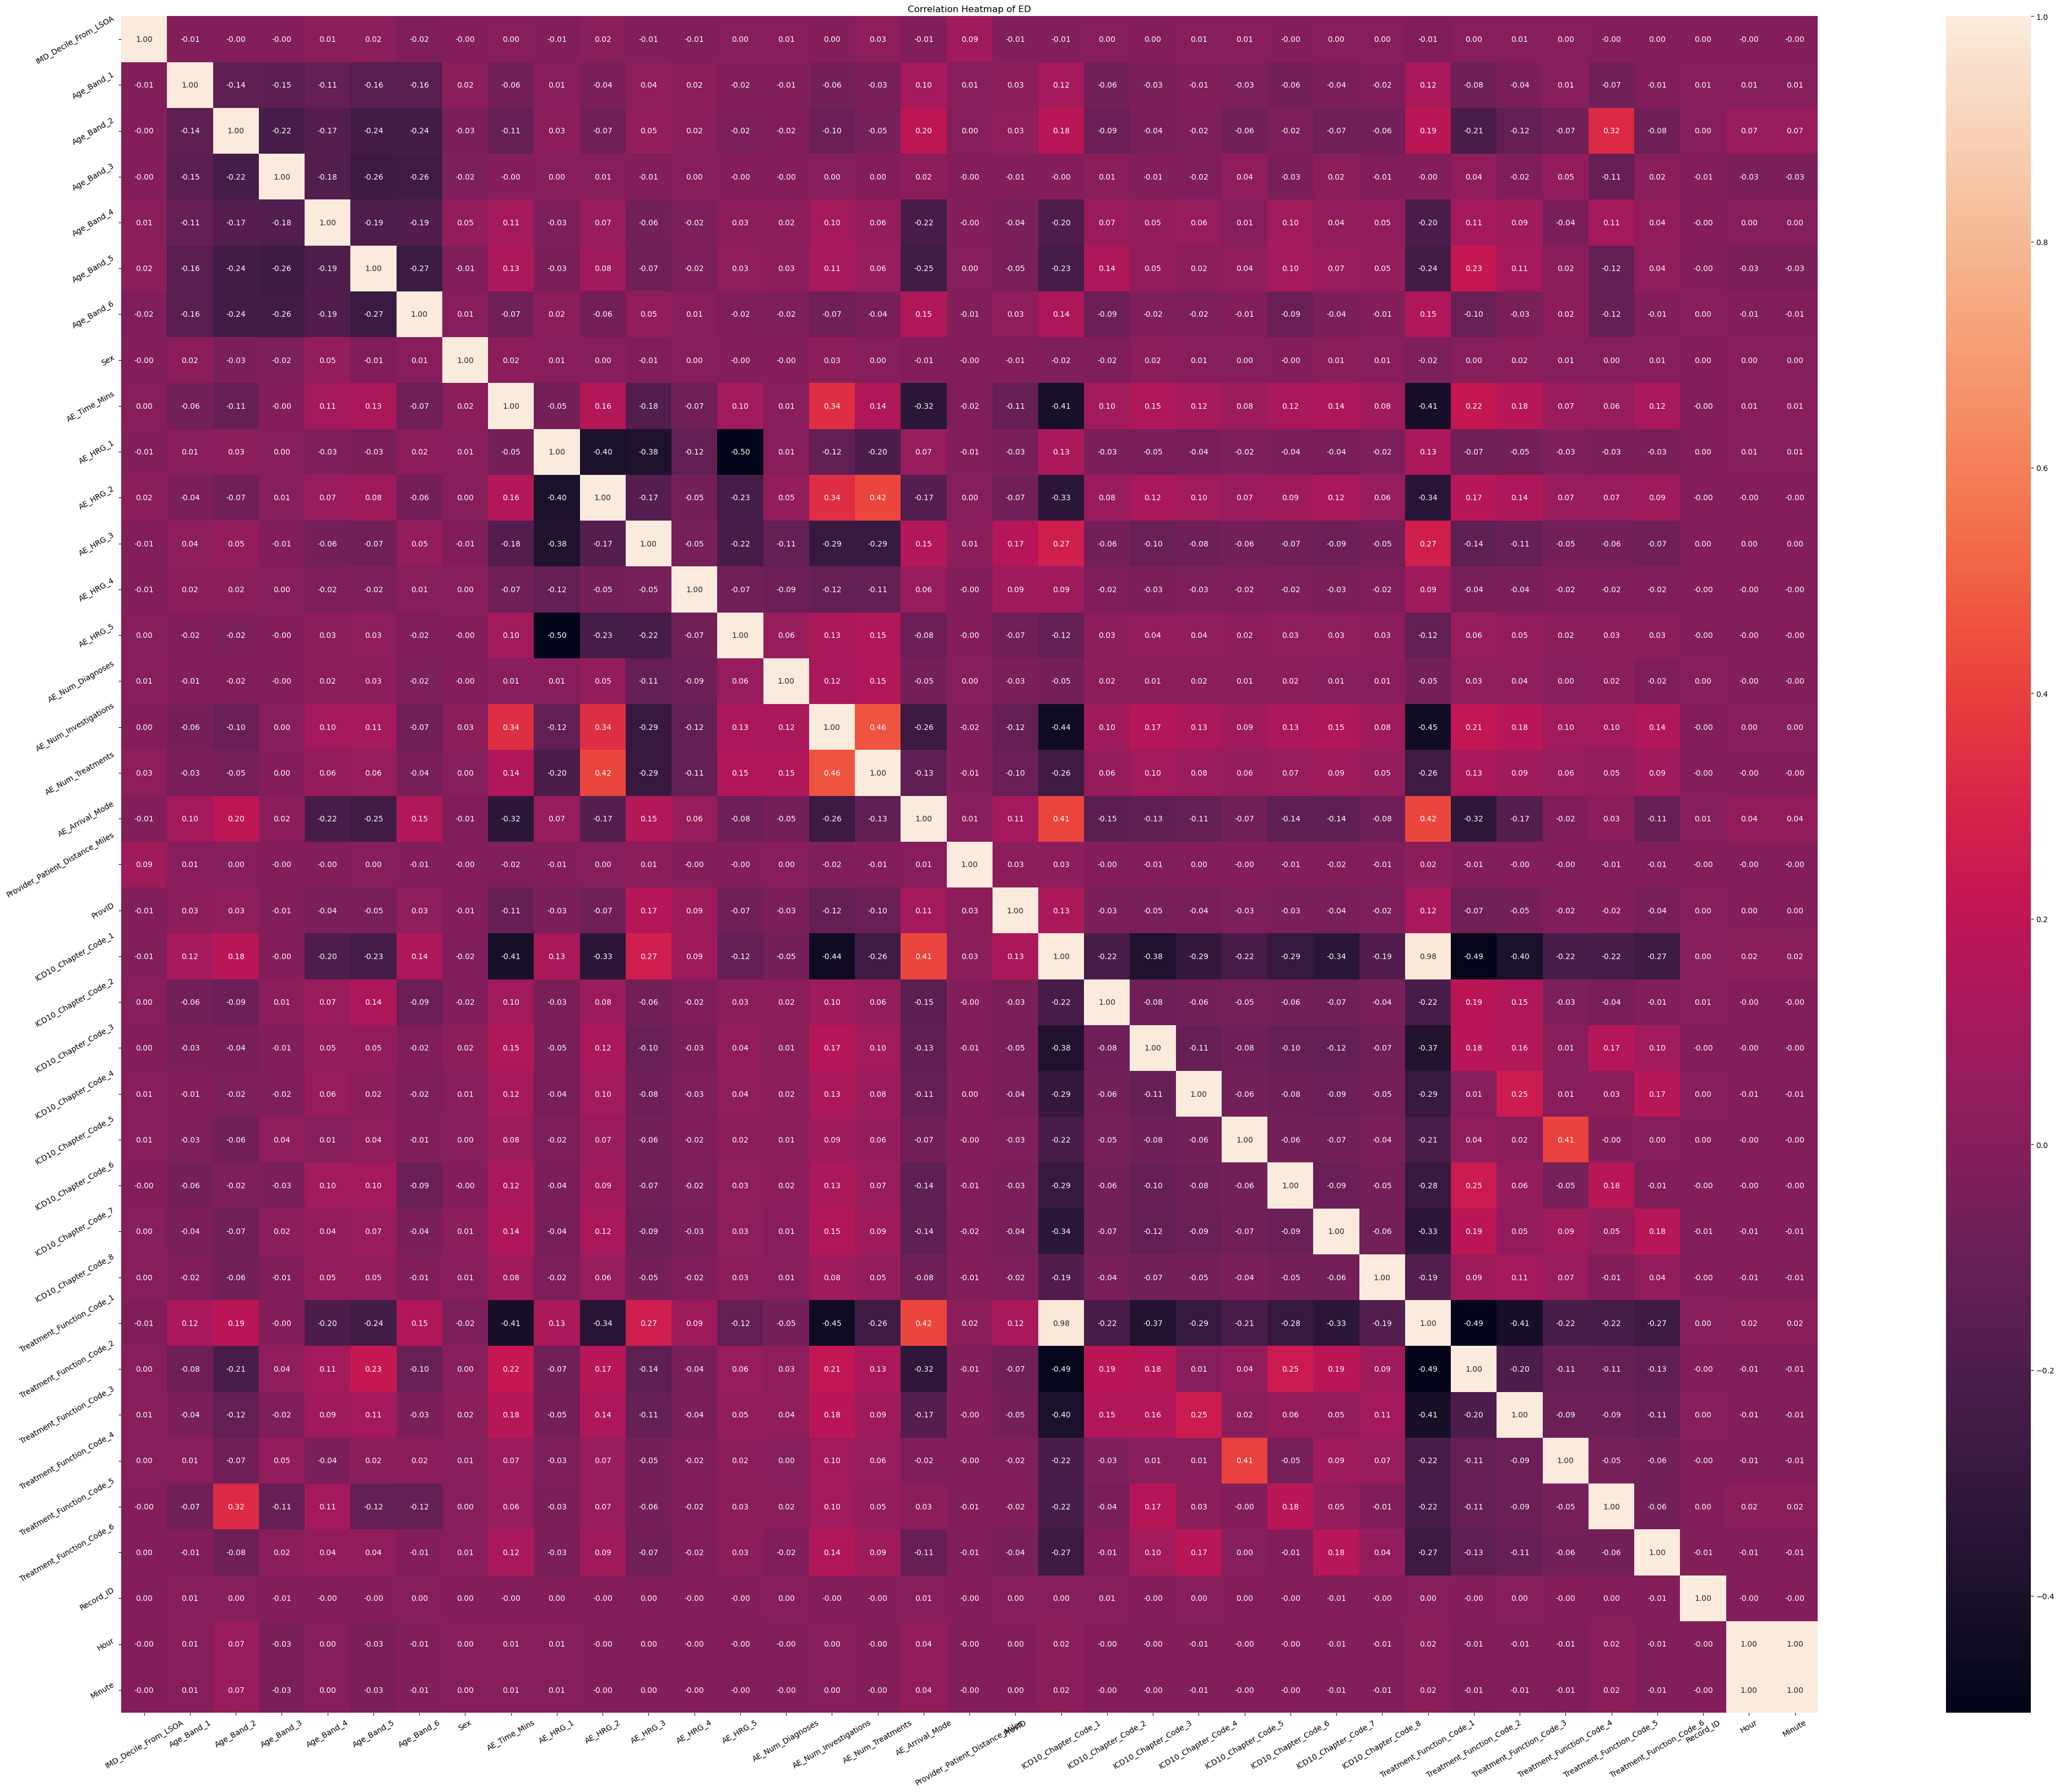

In [341]:
# Create correlation heatmap
plt.figure(figsize=(60, 40))
plt.title('Correlation Heatmap of ED')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

In [342]:

# Assuming you have your dataset loaded in a DataFrame 'df'
correlation_matrix = df_x.corr()

# Set a threshold for high correlation
high_corr_threshold = 0.9

# Find highly correlated features
high_corr_pairs = np.where(np.abs(correlation_matrix) > high_corr_threshold)
high_corr_features = [(correlation_matrix.index[i], correlation_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j]

# Print the highly correlated features
for feat1, feat2 in high_corr_features:
    print(f"Highly correlated features: {feat1} and {feat2}, Correlation: {correlation_matrix.loc[feat1, feat2]}")


Highly correlated features: ICD10_Chapter_Code_1 and Treatment_Function_Code_1, Correlation: 0.983160255375966
Highly correlated features: Treatment_Function_Code_1 and ICD10_Chapter_Code_1, Correlation: 0.983160255375966
Highly correlated features: Hour and Minute, Correlation: 1.0
Highly correlated features: Minute and Hour, Correlation: 1.0


#### Considerations
Due to strong correlation, we'll drop Minute and Treatment_Function_Code_1 features for optimization.

In [343]:
df_x = df_x.drop(columns = ['Minute', 'Treatment_Function_Code_1'])

In [344]:
# correlation heatmap features
df_x.columns

Index(['IMD_Decile_From_LSOA', 'Age_Band_1', 'Age_Band_2', 'Age_Band_3',
       'Age_Band_4', 'Age_Band_5', 'Age_Band_6', 'Sex', 'AE_Time_Mins',
       'AE_HRG_1', 'AE_HRG_2', 'AE_HRG_3', 'AE_HRG_4', 'AE_HRG_5',
       'AE_Num_Diagnoses', 'AE_Num_Investigations', 'AE_Num_Treatments',
       'AE_Arrival_Mode', 'Provider_Patient_Distance_Miles', 'ProvID',
       'ICD10_Chapter_Code_1', 'ICD10_Chapter_Code_2', 'ICD10_Chapter_Code_3',
       'ICD10_Chapter_Code_4', 'ICD10_Chapter_Code_5', 'ICD10_Chapter_Code_6',
       'ICD10_Chapter_Code_7', 'ICD10_Chapter_Code_8',
       'Treatment_Function_Code_2', 'Treatment_Function_Code_3',
       'Treatment_Function_Code_4', 'Treatment_Function_Code_5',
       'Treatment_Function_Code_6', 'Record_ID', 'Hour'],
      dtype='object')

#### Comments
For the initial feature selection, we opted for filter methods. They assess feature correlation with outcomes without relying on specific machine learning algorithms. Filter methods are computationally efficient and suitable for quickly identifying irrelevant features. We'll proceed with the selected features and also explore embedded methods, which iteratively extract impactful features during model training, enhancing training effectiveness. We didnt use any wrapper methods for feature selection as they could be computationally expensive.

# **5. Model Training** <a class="anchor" id="5"></a>



#### Actions
For most of our models asides the ensemble ones, we would use a combination of the features selected by K-best and the correlation matrix.
'Age_Band_5',
 'AE_Time_Mins',
 'AE_HRG_2',
 'AE_HRG_3',
 'AE_Num_Investigations',
 'AE_Num_Treatments',
 'AE_Arrival_Mode',
 'ICD10_Chapter_Code_1',
 'ICD10_Chapter_Code_2',
 'ICD10_Chapter_Code_3',
 'ICD10_Chapter_Code_4',
 'ICD10_Chapter_Code_5',
 'ICD10_Chapter_Code_6',
 'ICD10_Chapter_Code_7',
 'Treatment_Function_Code_2',
 'Treatment_Function_Code_3',
 'Treatment_Function_Code_4',
 'Treatment_Function_Code_5',
 'Treatment_Function_Code_6'
 

## 5.1. Logistic Regression with Ridge Regularization  <a class="anchor" id="5"></a>
​
[Back to Table of Contents](#0.1)

In [23]:
selected_feature_names.remove('Treatment_Function_Code_1')


In [24]:
selected_feature_names

['Age_Band_5',
 'AE_Time_Mins',
 'AE_HRG_2',
 'AE_HRG_3',
 'AE_Num_Investigations',
 'AE_Num_Treatments',
 'AE_Arrival_Mode',
 'ICD10_Chapter_Code_1',
 'ICD10_Chapter_Code_2',
 'ICD10_Chapter_Code_3',
 'ICD10_Chapter_Code_4',
 'ICD10_Chapter_Code_5',
 'ICD10_Chapter_Code_6',
 'ICD10_Chapter_Code_7',
 'Treatment_Function_Code_2',
 'Treatment_Function_Code_3',
 'Treatment_Function_Code_4',
 'Treatment_Function_Code_5',
 'Treatment_Function_Code_6']

We plan to initially train our model using all the available features before conducting any feature selection. This serves as a baseline to gauge the model's performance and provides a point of reference to assess the subsequent impact of feature selection techniques.

In [16]:

X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Create and train the Logistic Regression model with Ridge regularization
model_l = LogisticRegression()
model_l.fit(X_train, y_train)

# Predict the target values
y_pred = model_l.predict(X_test)

# Evaluate the model
accuracy1 = model_l.score(X_test, y_test)

# Calculate F1 score, precision, and recall
f11 = f1_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f11)
print("Precision:", precision1)
print("Recall:", recall1)
print("Accuracy:", accuracy1)

F1 Score: 0.7399939510031254
Precision: 0.741863755811603
Recall: 0.7381335478680612
Accuracy: 0.7409211914209654


In [25]:
# Logistic reg using the selected features
X_select = X[selected_feature_names]
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=10)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model with Ridge regularization
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=10)
model_l2.fit(X_train_scaled, y_train)

# Predict the target values
y_pred = model_l2.predict(X_test_scaled) 

# Evaluate the model
accuracy2 = model_l2.score(X_test_scaled, y_test)

# Calculate F1 score, precision, and recall
f12 = f1_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f12)
print("Precision:", precision2)
print("Recall:", recall2)
print("Accuracy:", accuracy2)





F1 Score: 0.9998491325119436
Precision: 1.0
Recall: 0.9996983105390185
Accuracy: 0.999849314380431


In [365]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9965
           1       1.00      1.00      1.00      9944

    accuracy                           1.00     19909
   macro avg       1.00      1.00      1.00     19909
weighted avg       1.00      1.00      1.00     19909



#### Using StandardScaler
We decided to scale the variables because scaling variables holds significant importance within various machine learning algorithms, as it can notably enhance model performance and promote smoother convergence during the training process. 

## 5.2. Decision Trees  <a class="anchor" id="5"></a>
​
[Back to Table of Contents](#0.1)

In [27]:
# Decision tree using alll our features
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)
pred1 = clf_dt.predict(X_test)

# Calculate evaluation metrics
accuracy3 = accuracy_score(y_test, pred1)
f13 = f1_score(y_test, pred1, average='weighted')
precision3 = precision_score(y_test, pred1, average='weighted')
recall3 = recall_score(y_test, pred1, average='weighted')

print(f"Accuracy: {accuracy3:.4f}")
print(f"F1 Score: {f13:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")

Accuracy: 0.9997
F1 Score: 0.9997
Precision: 0.9997
Recall: 0.9997


## 5.3. Random Forest using GridCV  <a class="anchor" id="5"></a>

Since Random Forests inherently possess embedded methods for feature selection, we will incorporate all the features into our model initially. Subsequently, we will leverage the built-in methods within Random Forests to identify the most relevant features for our analysis.
​

[Back to Table of Contents](#0.1)

In [367]:

X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define hyperparameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC score: {auc_score:.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9999
AUC score: 0.9999


#### Embedded Feature selection

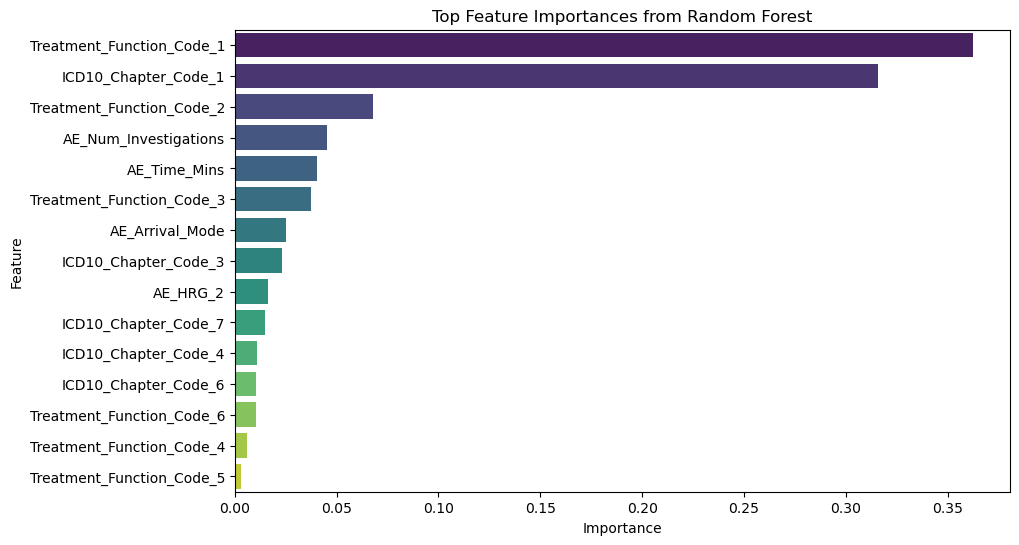

In [368]:

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to associate features with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances from Random Forest')
plt.show()


In [376]:
# 15 top important features from the random forest
rf_features = importance_df['Feature'].head(15).tolist()
rf_features

['Treatment_Function_Code_1',
 'ICD10_Chapter_Code_1',
 'Treatment_Function_Code_2',
 'AE_Num_Investigations',
 'AE_Time_Mins',
 'Treatment_Function_Code_3',
 'AE_Arrival_Mode',
 'ICD10_Chapter_Code_3',
 'AE_HRG_2',
 'ICD10_Chapter_Code_7',
 'ICD10_Chapter_Code_4',
 'ICD10_Chapter_Code_6',
 'Treatment_Function_Code_6',
 'Treatment_Function_Code_4',
 'Treatment_Function_Code_5']

In [29]:
rf_features = ['Treatment_Function_Code_1',
 'ICD10_Chapter_Code_1',
 'Treatment_Function_Code_2',
 'AE_Num_Investigations',
 'AE_Time_Mins',
 'Treatment_Function_Code_3',
 'AE_Arrival_Mode',
 'ICD10_Chapter_Code_3',
 'AE_HRG_2',
 'ICD10_Chapter_Code_7',
 'ICD10_Chapter_Code_4',
 'ICD10_Chapter_Code_6',
 'Treatment_Function_Code_6',
 'Treatment_Function_Code_4',
 'Treatment_Function_Code_5']

#### Caution
Despite taking precautions to prevent data leakage and performing appropriate scaling, our models consistently demonstrated remarkably high accuracy. Following our analysis of the random forest model, we aim to refine our approach by training a new model using the features selected from the initial model. This step reflects our progression toward improved feature selection.

In [30]:
X_final = X[rf_features]
y = df['Admitted_Flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
rf_model1 = RandomForestClassifier(random_state=42, max_depth = 1, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_model1.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model1.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy4 = accuracy_score(y_test, y_pred)
auc_score4 = roc_auc_score(y_test, y_pred)
f14 = f1_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f14)
print("Precision:", precision4)
print("Recall:", recall4)
print("Accuracy:", accuracy4)
print(f"AUC score: {auc_score4}")

F1 Score: 0.9983879093198993
Precision: 1.0
Recall: 0.9967810079468866
Accuracy: 0.9983926867245969
AUC score: 0.9983905039734433


## 5.4. XGBoost  <a class="anchor" id="5"></a>



[Back to Table of Contents](#0.1)

In [31]:
# XGBoost using our full feature dataset
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred)
f15 = f1_score(y_test, y_pred)
precision5 = precision_score(y_test, y_pred)
recall5 = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy5:.4f}")
print(f"F1 Score: {f15:.4f}")
print(f"Precision: {precision5:.4f}")
print(f"Recall: {recall5:.4f}")


Accuracy: 0.9998
F1 Score: 0.9998
Precision: 1.0000
Recall: 0.9997


## 5.5. K-Means Clustering  <a class="anchor" id="5"></a>



[Back to Table of Contents](#0.1)


In [33]:

# K-means clustering without our selected features 
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_select = X[selected_feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy6 = accuracy_score(y_test, y_pred)
f16 = f1_score(y_test, y_pred, average='weighted')
precision6 = precision_score(y_test, y_pred, average='weighted')
recall6 = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy6:.4f}")
print(f"F1 Score: {f16:.4f}")
print(f"Precision: {precision6:.4f}")
print(f"Recall: {recall6:.4f}")

Accuracy: 0.6489
F1 Score: 0.6489
Precision: 0.6489
Recall: 0.6489


In [34]:
# K-means clustering with our selected features
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_select = X[selected_feature_names]
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=10)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)


# Predict on the test set
y_pred = knn1.predict(X_test)

# Calculate evaluation metrics
accuracy7 = accuracy_score(y_test, y_pred)
f17 = f1_score(y_test, y_pred, average='weighted')
precision7 = precision_score(y_test, y_pred, average='weighted')
recall7 = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy7:.4f}")
print(f"F1 Score: {f17:.4f}")
print(f"Precision: {precision7:.4f}")
print(f"Recall: {recall7:.4f}")

Accuracy: 0.9752
F1 Score: 0.9752
Precision: 0.9755
Recall: 0.9752


## 5.6. Deep Neural Network  <a class="anchor" id="5"></a>

Sequential Neural Network

[Back to Table of Contents](#0.1)

In [394]:

X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_neural = X.values
y_neural = y.values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_neural, y_neural, test_size=0.2, random_state=10)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model_seq = Sequential()
model_seq.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_seq.add(Dense(64, activation='relu'))
model_seq.add(Dense(1, activation='sigmoid'))  # Binary classification (admitted or not)

# Compile the model
model_seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_seq.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy8 = model_seq.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy8:.4f}')


# Predict on the test set
y_pred = model_seq.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate classification metrics
classification_rep = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', classification_rep)

Epoch 1/10
1991/1991 [==============================] - 5s 2ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 4.6067e-05 - val_accuracy: 1.0000
Epoch 2/10
1991/1991 [==============================] - 4s 2ms/step - loss: 9.0604e-04 - accuracy: 0.9999 - val_loss: 3.1500e-05 - val_accuracy: 1.0000
Epoch 3/10
1991/1991 [==============================] - 4s 2ms/step - loss: 9.0220e-04 - accuracy: 0.9999 - val_loss: 4.8662e-05 - val_accuracy: 1.0000
Epoch 4/10
1991/1991 [==============================] - 4s 2ms/step - loss: 8.7642e-04 - accuracy: 0.9999 - val_loss: 8.9103e-05 - val_accuracy: 1.0000
Epoch 5/10
1991/1991 [==============================] - 4s 2ms/step - loss: 6.7607e-04 - accuracy: 0.9999 - val_loss: 1.4180e-05 - val_accuracy: 1.0000
Epoch 6/10
1991/1991 [==============================] - 4s 2ms/step - loss: 7.3956e-04 - accuracy: 0.9999 - val_loss: 6.3845e-05 - val_accuracy: 1.0000
Epoch 7/10
1991/1991 [==============================] - 4s 2ms/step - loss: 5.6871e-04 - acc

# **6. Results** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

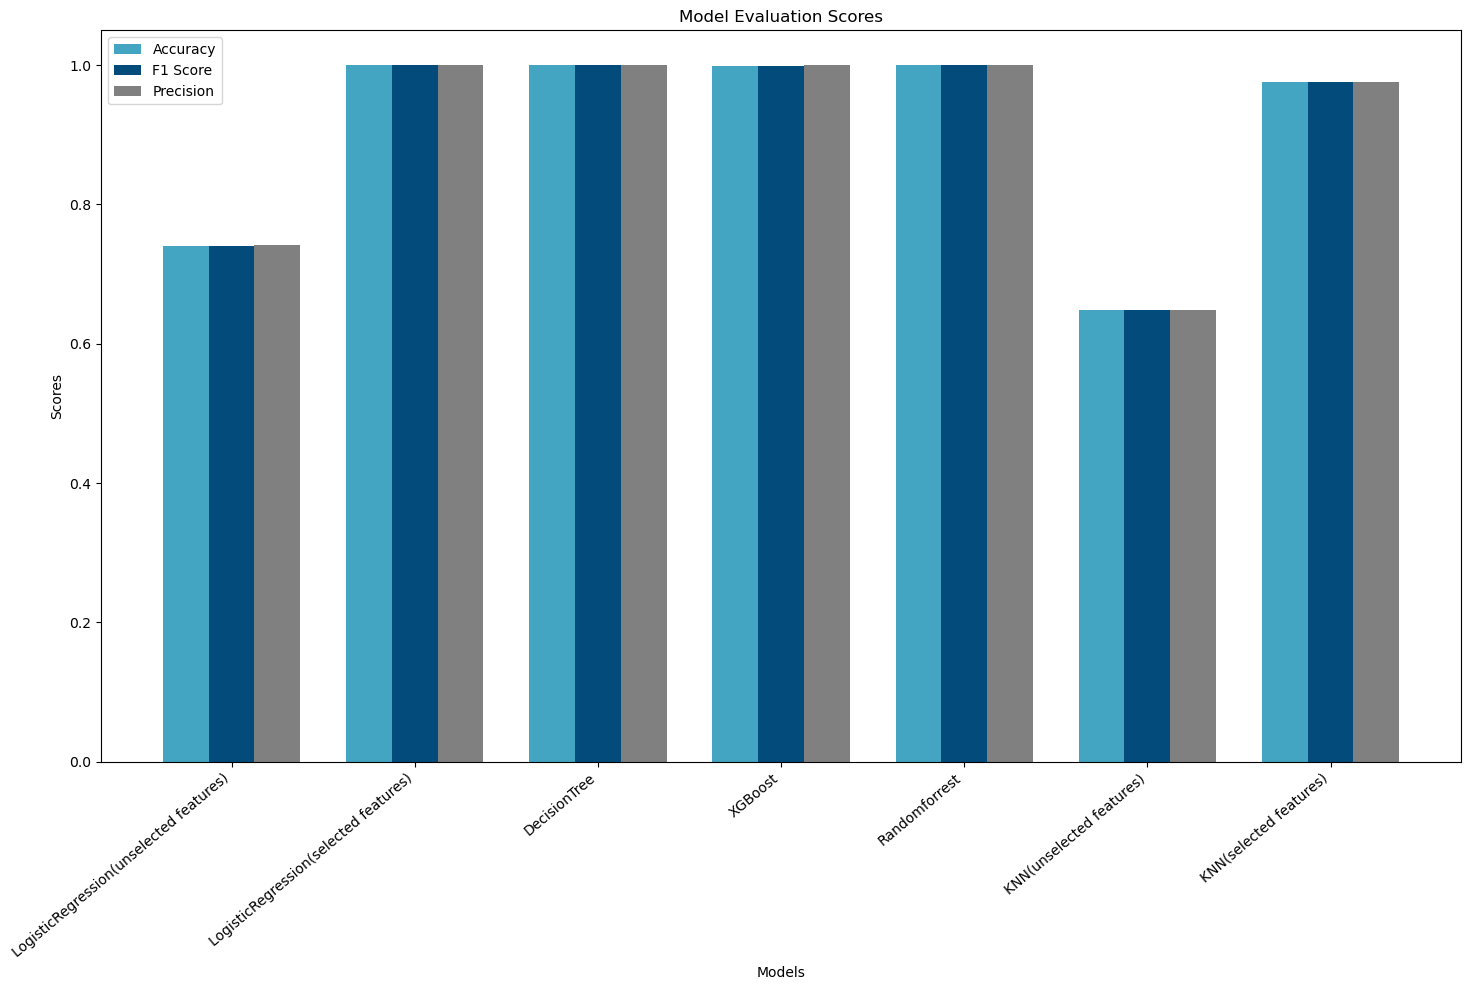

In [48]:



# List of model names
model_names = [model_l,model_l2,clf_dt,rf_model1,xgb_classifier,knn,knn1]

# List of accuracy scores for each model
accuracy_scores = [accuracy1,accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7]

# List of F1 scores for each model
f1_scores = [f11, f12, f13, f14, f15, f16, f17]

# List of precision scores for each model
precision_scores = [precision1, precision2, precision3, precision4, precision5, precision6, precision7]

# Create subplots
fig, ax = plt.subplots(figsize=(15, 10))

# Bar width
bar_width = 0.25


# Positions for the bars
positions = np.arange(len(model_names))

# Bar plots for accuracy, F1 score, and precision
ax.bar(positions - bar_width, accuracy_scores, width=bar_width, label='Accuracy',color="#44a5c2")
ax.bar(positions, f1_scores, width=bar_width, label='F1 Score',color="#024b7a")
ax.bar(positions + bar_width, precision_scores, width=bar_width, label='Precision',color='grey')
models_names = ['LogisticRegression(unselected features)', 'LogisticRegression(selected features)', 'DecisionTree', 'XGBoost', 'Randomforrest', 'KNN(unselected features)', 'KNN(selected features)']
# Set the x-axis labels and title
ax.set_xticks(positions)
ax.set_xticklabels(models_names, rotation=40, ha='right')  # Display model names
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Scores')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

-give some explanation for your model training
-plot the graph better
give an explanation for the results, how many people are admitted correct and how many under or over traiges are prevented
- submit the work (ask lars)
-conclusions and limitations

In [404]:
test = pd.read_csv('/kaggle/input/bip-ae-technical-challenge/test_set.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             49876 non-null  float64
 1   Age_Band                         50000 non-null  object 
 2   Sex                              49770 non-null  float64
 3   AE_Arrive_Date                   50000 non-null  object 
 4   AE_Arrive_HourOfDay              49770 non-null  object 
 5   AE_Time_Mins                     50000 non-null  int64  
 6   AE_HRG                           49227 non-null  object 
 7   AE_Num_Diagnoses                 50000 non-null  int64  
 8   AE_Num_Investigations            50000 non-null  int64  
 9   AE_Num_Treatments                50000 non-null  int64  
 10  AE_Arrival_Mode                  50000 non-null  int64  
 11  Provider_Patient_Distance_Miles  49876 non-null  float64
 12  ProvID            

put the below into a function

In [ ]:
test['AE_HRG'] = test['AE_HRG'].fillna('Unknown')
test['AE_Arrive_Date'] = pd.to_datetime(test['AE_Arrive_Date'])
test['AE_Arrive_HourOfDay'] = pd.to_datetime(test['AE_Arrive_HourOfDay'], format='%H-%M').dt.time
test['Hour'] = pd.to_datetime(test['AE_Arrive_HourOfDay'], format='%H:%M:%S').dt.hour
test['Minute'] = pd.to_datetime(test['AE_Arrive_HourOfDay'], format='%H:%M:%S').dt.minute
test['Sex'] = test['Sex'].fillna(2.0)
test['ICD10_Chapter_Code'] = test['ICD10_Chapter_Code'].fillna('Unknown')
test['Treatment_Function_Code'] = test['Treatment_Function_Code'].fillna('Unknown')
# droping the Length_Of_Stay_Days and date column
test = test.drop(columns = ['AE_Arrive_Date', 'AE_Arrive_HourOfDay'])

use pipeline

In [ ]:
# category_columns =[col for col in test.columns if test[col].dtype == 'object']


# # Preprocess test data
# final_X_test = pd.DataFrame(OH_encoder.transform(test[category_columns]))
# print(final_X_test.isna().any().any())

# final_X_test.index = test.index
# final_X_test.columns = final_X_test.columns.astype(str)
# print(final_X_test.shape)


# num_X_test = test.drop(category_columns, axis=1)
# num_X_test = num_X_test.fillna(num_X_test.mean())
# print(num_X_test.shape)

# num_X_test.columns= num_X_test.columns.astype(str)
# print(num_X_test.isna().any().any())







# # Concatenate the DataFrames along the columns axis
# OH_X_test = pd.merge(num_X_test, final_X_test, left_index=True, right_index=True)
# X_final = OH_X_test[top_k_feature]



# print(X_final.info())


# preds_test = best_rf_model.predict(X_final)
# preds_test


In [ ]:
# output = pd.DataFrame({'Record_ID': X_final['Record_ID'],
#                        'Admitted_Flag': preds_test})

# # output = output.reset_index(drop=True, inplace=True)

# output.to_csv('submission.csv', index=False)